In [1]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from analysis import *
from flexibeam import *

In [2]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

**Dataset 1**

In [5]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)
print(doas)
print(widths)

# Arbitrary values (stolen from last year LOL)
# doas = np.array([ 92.3, 225.3])
# widths = np.array([14.02998362, 54.83234333])

b_gains, ts = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

[ 93.3  200.7  224.1  243.9  261.45]
[ 4.22883356  5.34833018  9.12347411 31.2373853   3.91331811]


((10000,), (10000,))

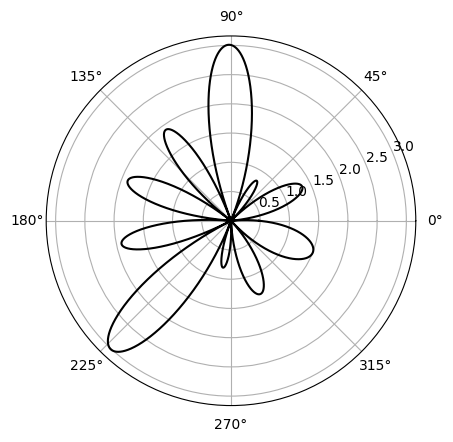

In [6]:
# plt.figure(figsize=(10,8))
# plt.polar()
# plt.plot(np.arange(N)/N*2*np.pi,gain)
# plt.show()

plt.polar(ts, b_gains, '-k')
plt.show()

**Dataset 2**

In [9]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)
print(doas)
print(widths)

# Arbitrary values (stolen from last year LOL)
# doas = np.array([ 88.7, 231.6])
# widths = np.array([20.50426162, 83.06718354])

b_gains, ts = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

[ 82.65  93.15 178.5  196.8  224.25 249.45 265.5 ]
[ 2.82283602  1.93042733  4.09505453  6.33811976 15.07217332  7.63419419
  3.84660434]


((10000,), (10000,))

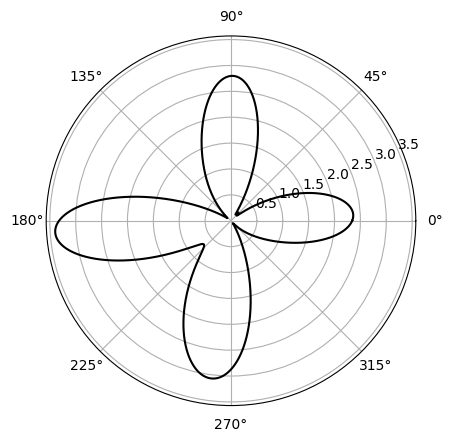

In [10]:
# plt.figure(figsize=(10,8))
# plt.polar()
# plt.plot(np.arange(N)/N*2*np.pi,gain)
# plt.show()

plt.polar(ts, b_gains, '-k')
plt.show()